Dieses Notebook behandelt die Bewegung auf einer Kreisbahn, die Zentripetalbeschleunigung und Zentripetalkraft, 
aber auch die Darstellung der Kreisbewegung mittels komplexer Zahlen.

Die Bewegung eines Körpers auf einer Kreisbahn ist definiert duch die Bedingung dass der Abstand des Körpers vom 
Kreismittelpunkt konstan bleibt, d.h.
$$\sqrt{x^2+y^2} = const $$

Wenn wir die Position des Körpers statt im karthesischen Koordinatensystem $(x,y)$, in Polarkoordinaten 
$(r,\phi)$ mit
$$r = \sqrt{x^2+y^2}$$
und 
$$\phi = \tan^{-1}\left(\frac{y}{x}\right)$$
angeben, dann 
ist diese Bedingung deutlich einfacher zu formulieren, nämlich:
$$r = const $$

Wir können einen Kreis in Polarkoordinaten auch sehr einfach graphisch darstellen:

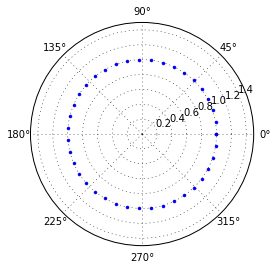

In [1]:
from math import *
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

phi = linspace(0,2*pi,40) # phi läuft on 0 bis 2*pi
r   = ones((40,1))        # r hingegen ist konstant für den gesamten Kreis

polar(phi,r,'.')
# Die Einbindung von Matplotlib bewirkt, dass Befehle sehr ähnlich denen in Matlab sind.
# Hier wollen wir, z.B. den Durchmesser unseres Polarplots festlegen:
gca().set_rmax(1.5)   

Noch einfacher geht das Rechnen, wenn wir für die Definition der Punkte auf dem Kreis komplexe Zahlen verwenden.

Komplexe Zahlen 
$$Z = Z_r + i \cdot Z_i = \Re[Z] + i\cdot \Im[Z]$$
haben einen Realteil und einen Imaginärteil, wobei der Realteil $Z_r$ mit $\Re[Z]$ und der Imaginärteil $Z_i$ mit $\Im[Z]$ bezeichnet wird.

Komplexe Zahlen sind ebenso 2-dimensional, wie unser Kreis und eignen sich daher sehr gut, um im 2D-Raum zu rechnen.

Ein Kreis wird nun sehr einfach durch die komplexe Funktion des Winkels $\phi$  beschrieben:
$$f(\phi) = e^{i \phi} = \cos(\phi) + i\cdot \sin(\phi)$$

denn 
$$\Re[f(\phi)] = \cos(\phi)$$

und 
$$\Im[f(\phi)] = \sin(\phi)$$



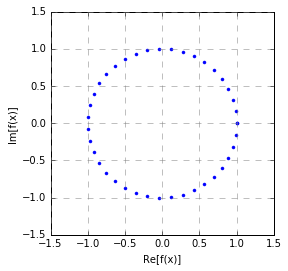

In [2]:
# Die komplexe Exponentialfunktion:
z=exp(1j*phi)

# Jetzt können wir die komplexe Funktion darstellen
plot(z.real,z.imag,'.')
xlabel('Re[f(x)]')
ylabel('Im[f(x)]')
xlim(-1.5, 1.5)            # Definiert die Endwert auf der Abszisse
ylim(-1.5, 1.5)            # Definiert die Endwert auf der Ordinate
gca().set_aspect('equal')  # Bewirkt, dass der Plot quadratisch wird
gca().grid(color='gray', linestyle='dashed') # Stellt Hilfslinien dar

Es gilt $i^2 = -1 $ , so dass
$$i \cdot f(\phi) = i\cdot e^{i \phi} = i\cdot \cos(\phi) - 1\cdot \sin(\phi)$$

Daraus folgt:
$$\Re[i \cdot f(\phi)] = -\Im[f(\phi)] $$
und 
$$\Im[i \cdot f(\phi)] = \Re[f(\phi)] $$

Wir können auch diesen Zusammenhang graphisch darstellen und zeigen, dass eine Multiplikation mit $i$ einer Rotation um 90° entspricht.

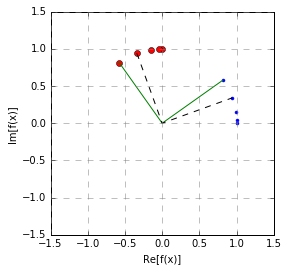

In [3]:
phi = linspace(0,pi/4,5) # phi läuft on 0 bis 2*pi
r   = ones((5,1))        # r hingegen ist konstant für den gesamten Kreis

# Hier generieren wir die komplexen Zahlenfelder z und i*z (i = '1j' in Python)
z  = exp(1j*phi**2)
zi = z*1j

# Der Rest ist nur für die schöne Darstellung
plot(z.real,z.imag,'b.')
plot(zi.real,zi.imag,'ro')
xlabel('Re[f(x)]')
ylabel('Im[f(x)]')
xlim(-1.5, 1.5)            # Definiert die Endwerte auf der Abszisse
ylim(-1.5, 1.5)            # Definiert die Endwerte auf der Ordinate
gca().set_aspect('equal')  # Bewirkt, dass der Plot quadratisch wird
gca().grid(color='gray', linestyle='dashed') # Stellt Hilfslinien dar

# Nun können wir auch noch die jeweils letzten 2 Elemente unserer Serien mit Linien zum Ursprung versehen
zl = array([zi[-1],0,z[-1]])
plot(zl.real,zl.imag,'g')
zl = array([zi[-2],0,z[-2]])
plot(zl.real,zl.imag,'k--')

Wir können jetzt die Bewegung eines Körpers auf einer Kreisbahn auf mehrere Arten darstellen.   	
 Wir können schreiben
$$\vec{r}(t) = \begin{pmatrix}x(t) \\\ y(t) \end{pmatrix} = \begin{pmatrix}r\cos(\phi(t)) \\\ r\sin(\phi(t)) \end{pmatrix}= \begin{pmatrix}r\cos(\omega t) \\\ r\sin(\omega t) \end{pmatrix}$$

Wir können aber auch schreiben
$$f(t) = r e^{i \omega t} $$
und dann
$$\vec{r}(t) = \begin{pmatrix}\Re[f(t)] \\\ \Im[f(t)] \end{pmatrix} = \begin{pmatrix}\Re[r e^{i \omega t}] \\\ \Im[r e^{i \omega t}] \end{pmatrix}$$

Möchten wir jetzt die momentane Geschwindigkeit wissen, dann berechnen wir einfach $\partial \vec{r} / \partial t$:
$$\vec{v} = \dot{\vec{r}} = \frac{\partial \vec{r}}{\partial t} 
=  \begin{pmatrix}\Re[i \omega r e^{i \omega t}] \\\ \Im[i \omega r e^{i \omega t}] \end{pmatrix}  
=  \omega \begin{pmatrix}-\Im[r e^{i \omega t}] \\\ \Re[r e^{i \omega t}] \end{pmatrix}
=  \omega \begin{pmatrix}-y(t) \\\ x(t) \end{pmatrix}$$

Dieser Vektor steht immer senkrecht auf dem Vektor $\vec{r}$, da 
$$\vec{r} \cdot  \begin{pmatrix}-y \\\ x \end{pmatrix} = \begin{pmatrix}x \\\ y \end{pmatrix} \cdot \begin{pmatrix}-y \\\ x \end{pmatrix} = -xy + yx = 0$$

Möchten wir jetzt die Zentripetalbeschleunigung wissen, dann leiten wir einfach erneut nach der Zeit ab:
$$ \vec{a}_{ZP} = \dot{\vec{v}}  
=  \begin{pmatrix}\Re[i^2 \omega^2 r e^{i \omega t}] \\\ \Im[i^2 \omega^2 r e^{i \omega t}] \end{pmatrix}  
=  \omega^2 \begin{pmatrix}-\Re[r e^{i \omega t}] \\\ -\Im[r e^{i \omega t}] \end{pmatrix}
=  \omega^2 \begin{pmatrix}-x(t) \\\ -y(t) \end{pmatrix}
= -\omega^2 \vec{r}$$

Im folgenden betrachten wir einfach die Umlaufgeschwindigkeit eines Satelliten um die Erde. 

Damit dieser nicht vom Himmel fällt, muss seine Geschwindigkeit so groß sein, dass die Erdbeschleunigung 
gerade gleich der Zentripetalbeschleunigung für eine Kreisbahn des gewünschten Radius ist.    

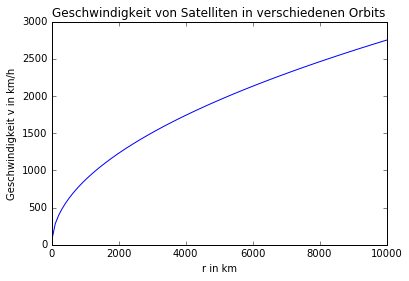

In [4]:
from scipy.constants import g  # wir importieren die Erdbeschleunigung in m/s^2

# Wir wollen die Geschwindigkeit für verschiedene Orbits berechnen (6 .. 10000km)
# (Der Satellit bleibt im Orbit, wenn die Erdbeschleunigung die korrekte 
# Zentripetalbeschleunigung erzeugt.
r = linspace(6e3,10000e3,100)

# Die Geschwindigkeit, die der Satellit haben sollte, ist
v=sqrt(g*r)

# Wir stellen jetzt die Geschwindigkeit in km/h als Funktion des Radius in km dar
plot(r/1000.0,v/3.6)
xlabel('r in km')
ylabel('Geschwindigkeit v in km/h')
title('Geschwindigkeit von Satelliten in verschiedenen Orbits')

Wir können nun auch die Umlaufzeit des Satelliten berechnen

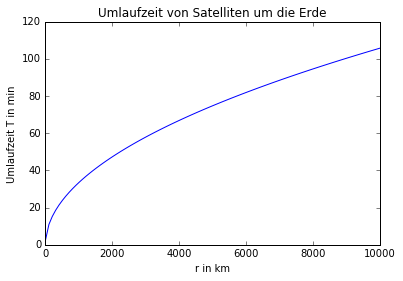

In [6]:
# Die Umlaufzeit, die der Satellit dann um die Erde hat ist Umfang/Geschwindigkeit:
T = 2*pi*r/v

# Wir stellen jetzt die Umlaufzeit in Minuten als Funktion des Radius in km dar
plot(r/1000.0,T/60.0)
xlabel('r in km')
ylabel('Umlaufzeit T in min')
title('Umlaufzeit von Satelliten um die Erde')